In [7]:
pwd

'/Users/loganbon/Documents/GitHub/databootcamp/work_here/Project Repos/Edit'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
df_replace = pd.read_csv("DFs/keywords_raw.csv").fillna(0)
df_replace = df_replace.rename(columns={"Unnamed: 0":"Keywords"})
df_replace.head()

,Keywords,2020,2016,2012,2008
0,Coronavirus (2019-nCoV),13860.0,0.0,0.0,0.0
1,United States Politics and Government,4050.0,1079.0,1452.0,1270.0
2,"Trump, Donald J",3788.0,3050.0,26.0,8.0
3,Presidential Election of 2020,3072.0,3.0,0.0,0.0
4,Quarantines,2936.0,2.0,0.0,0.0


In [10]:
df_replace['2008-16 Average']=df_replace[['2016', '2012', '2008']].mean(axis=1)
df_replace.head()

,Keywords,2020,2016,2012,2008,2008-16 Average
0,Coronavirus (2019-nCoV),13860.0,0.0,0.0,0.0,0.000000
1,United States Politics and Government,4050.0,1079.0,1452.0,1270.0,1267.000000
2,"Trump, Donald J",3788.0,3050.0,26.0,8.0,1028.000000
3,Presidential Election of 2020,3072.0,3.0,0.0,0.0,1.000000
4,Quarantines,2936.0,2.0,0.0,0.0,0.666667


In [11]:
df_replace=df_replace.loc[(df_replace['2008']>0) & (df_replace['2012']>0) & (df_replace['2016']>0)]
df_replace['Keyword Ocurrence Change']=df_replace["2020"]/df_replace["2008-16 Average"]
df = df_replace.sort_values('Keyword Ocurrence Change', ascending=False)
df.head()

,Keywords,2020,2016,2012,2008,2008-16 Average,Keyword Ocurrence Change
160,"Fauci, Anthony S",185.0,3.0,1.0,1.0,1.666667,111.000000
13,Epidemics,1316.0,30.0,29.0,13.0,24.000000,54.833333
156,Videophones and Videoconferencing,188.0,11.0,3.0,1.0,5.000000,37.600000
19,"Biden, Joseph R Jr",1128.0,33.0,61.0,9.0,34.333333,32.854369
16,Shutdowns (Institutional),1265.0,49.0,51.0,34.0,44.666667,28.320896


In [12]:
def percent_of_total(keyword):
    points = []
    row = df.loc[df["Keywords"]==f"{keyword}",["2008", "2012", "2016","2020"]]
    total = row.sum(axis=1)
    for i in row:
        row[i] = round(row[i]/total*100,2)
        points.append(float(row[i]))
    x_value = np.arange(4)
    labels = ["2008", "2012", "2016","2020"]
    return points, x_value, labels

def plot_three_keywords(keyword_1,keyword_2,keyword_3):
    # running functions
    points_1, x_values, labels = percent_of_total(f"{keyword_1}")
    points_2, x_values, labels = percent_of_total(f"{keyword_2}")
    points_3, x_values, labels = percent_of_total(f"{keyword_3}")

    # plotting
    plt.figure(figsize=(15,7))
    width = 0.2
    plt.bar(x_values, points_1 , width, label=f"{keyword_1}")
    plt.bar(x_values + width, points_2, width, label=f"{keyword_2}")
    plt.bar(x_values + (width*2), points_3, width, label=f"{keyword_3}")

    # Chart design
    plt.ylabel("%",size=12)
    plt.title(f"Percent of Keyword Mentions (March-July)",size=14)
    plt.xticks(x_values + width, ("2008", "2012", "2016","2020"),size=12)
    plt.yticks(size=12)
    plt.legend(loc='best')
    plt.show()
    
def plot_two_keywords(keyword_1,keyword_2):
    # running functions
    points_1, x_values, labels = percent_of_total(f"{keyword_1}")
    points_2, x_values, labels = percent_of_total(f"{keyword_2}")

    # plotting
    plt.figure(figsize=(15,7))
    width = 0.2
    plt.bar(x_values, points_1 , width, label=f"{keyword_1}")
    plt.bar(x_values + width, points_2, width, label=f"{keyword_2}")

    # Chart design
    plt.ylabel("%",size=12)
    plt.title(f"Percent of Keyword Mentions (March-July)",size=14)
    plt.xticks(x_values+width/2, ("2008", "2012", "2016","2020"),size=12)
    plt.yticks(size=12)
    plt.legend(loc='best')
    plt.show()

## Education

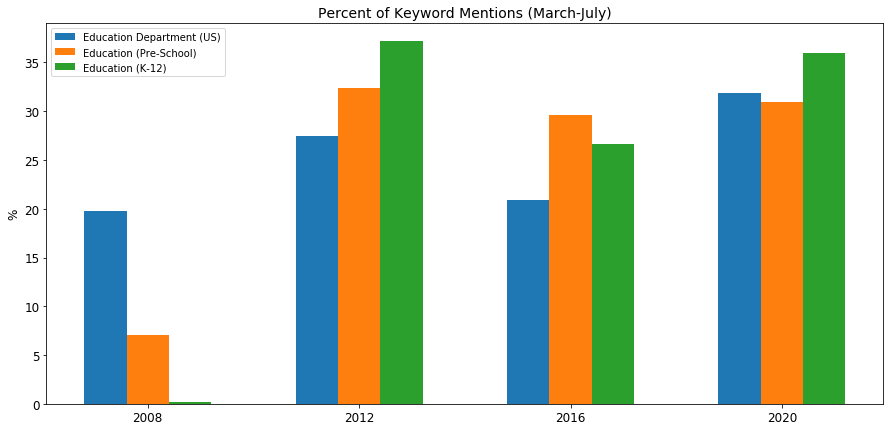

In [13]:
plot_three_keywords("Education Department (US)","Education (Pre-School)","Education (K-12)")

## Economy

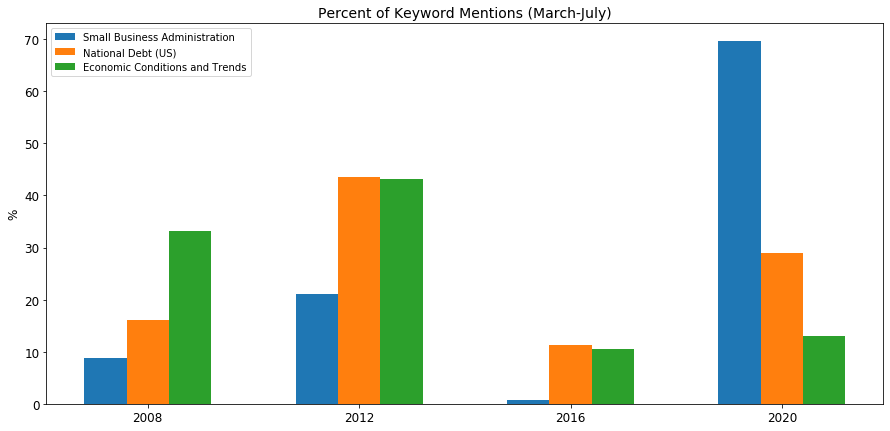

In [14]:
plot_three_keywords("Small Business Administration","National Debt (US)","Economic Conditions and Trends")

## Healthcare

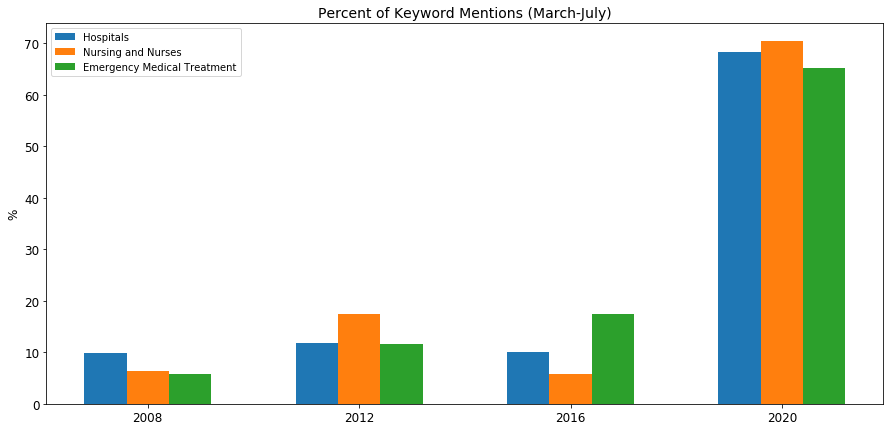

In [15]:
plot_three_keywords("Hospitals","Nursing and Nurses","Emergency Medical Treatment")

## Politics

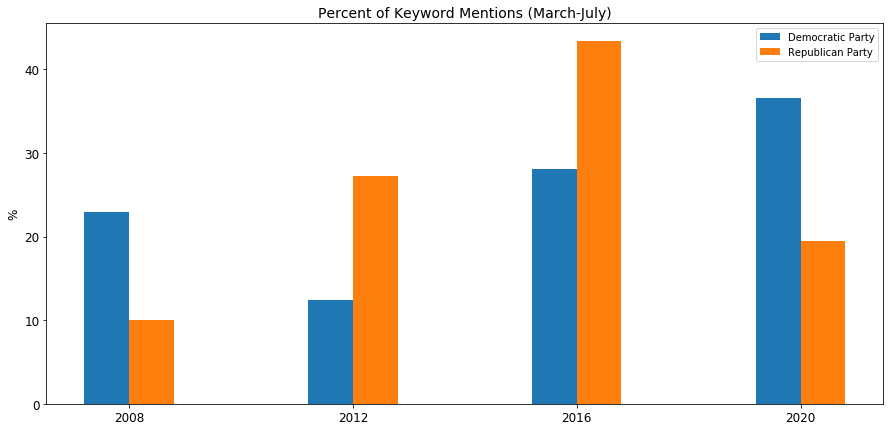

In [16]:
plot_two_keywords("Democratic Party","Republican Party")

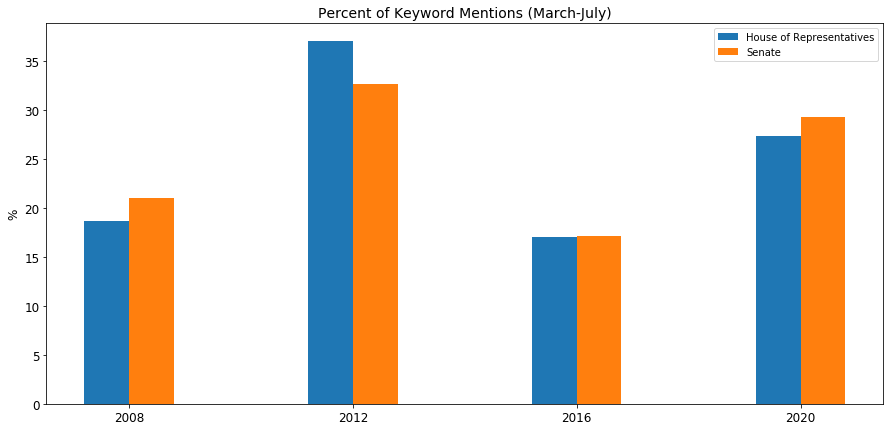

In [17]:
plot_two_keywords("House of Representatives","Senate")

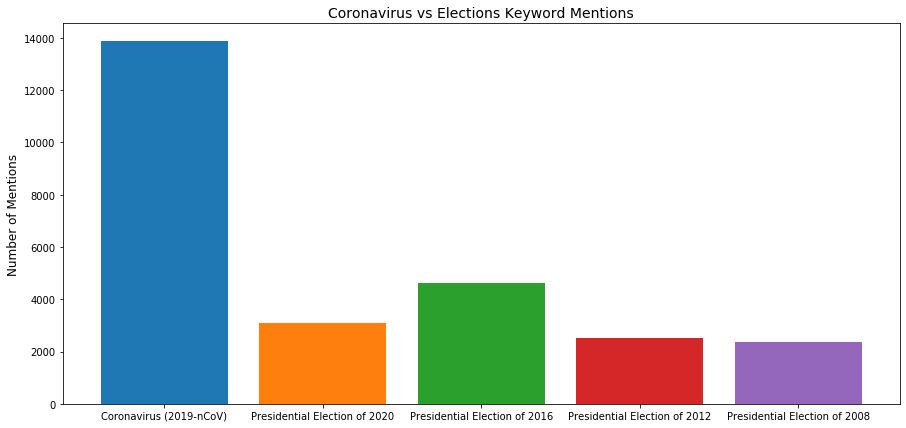

In [18]:
# wrangling data
df_2008 = pd.read_csv("DFs/bryan/2008_dates_and_keyword.csv")
df_2012 = pd.read_csv("DFs/bryan/2012_dates_and_keyword.csv")
df_2016 = pd.read_csv("DFs/bryan/2016_dates_and_keyword.csv")
df_2020 = pd.read_csv("DFs/bryan/2020_dates_and_keyword.csv")
df_raw = pd.concat([df_2020,df_2016,df_2012,df_2008])
df_raw = df_raw.drop("Unnamed: 0",axis=1)

# get keyword counts
keyword_count = df_raw.keywords.value_counts()

# finding counts for desired keywords
counts_2008 = keyword_count.loc[keyword_count.index=="Presidential Election of 2008"]
counts_2012 = keyword_count.loc[keyword_count.index=="Presidential Election of 2012"]
counts_2016 = keyword_count.loc[keyword_count.index=="Presidential Election of 2016"]
counts_2020 = keyword_count.loc[keyword_count.index=="Presidential Election of 2020"]
coronavirus = keyword_count.loc[keyword_count.index=="Coronavirus (2019-nCoV)"]

#plotting
plt.figure(figsize=(15,7))
plt.xticks([1,2,3,4,5],labels=["Coronavirus (2019-nCoV)","Presidential Election of 2020","Presidential Election of 2016","Presidential Election of 2012","Presidential Election of 2008"],size=10)
plt.bar(1,coronavirus,label="Coronavirus (2019-nCoV)")
plt.bar(2,counts_2020)
plt.bar(3,counts_2016)
plt.bar(4,counts_2012)
plt.bar(5,counts_2008)
plt.title("Coronavirus vs Elections Keyword Mentions",size=14)
plt.ylabel("Number of Mentions",size=12)
plt.show()

## Government

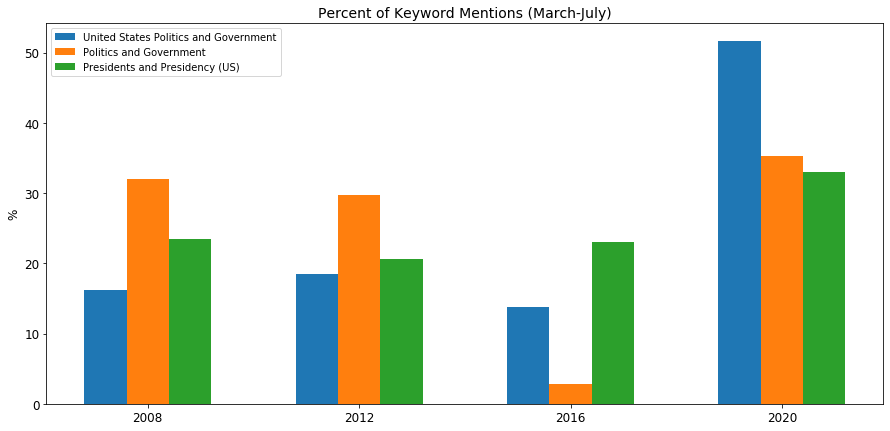

In [19]:
plot_three_keywords("United States Politics and Government","Politics and Government","Presidents and Presidency (US)")

## Taxes

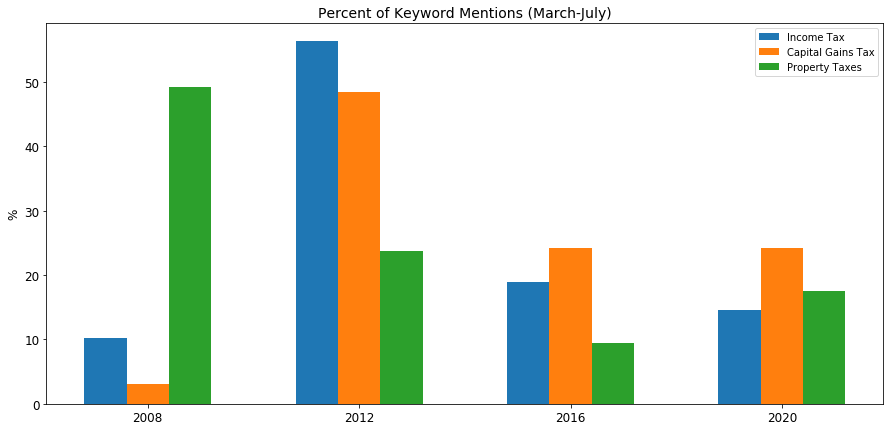

In [20]:
plot_three_keywords("Income Tax","Capital Gains Tax","Property Taxes")

## Gun Policy

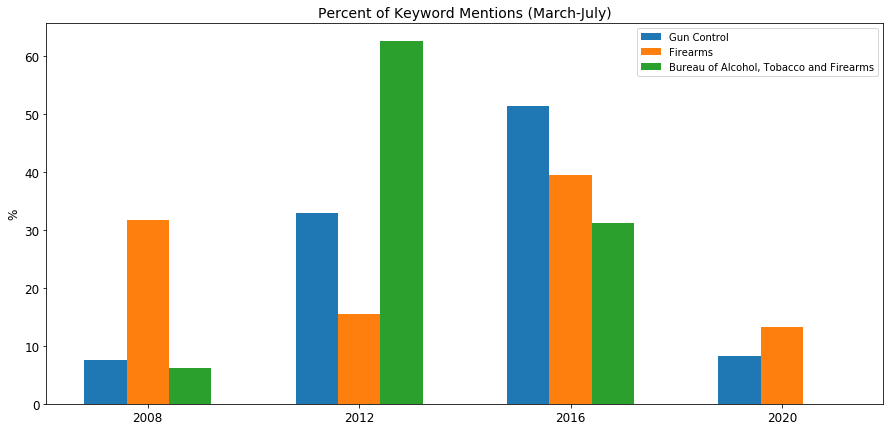

In [21]:
plot_three_keywords("Gun Control","Firearms","Bureau of Alcohol, Tobacco and Firearms")

## Terrorism

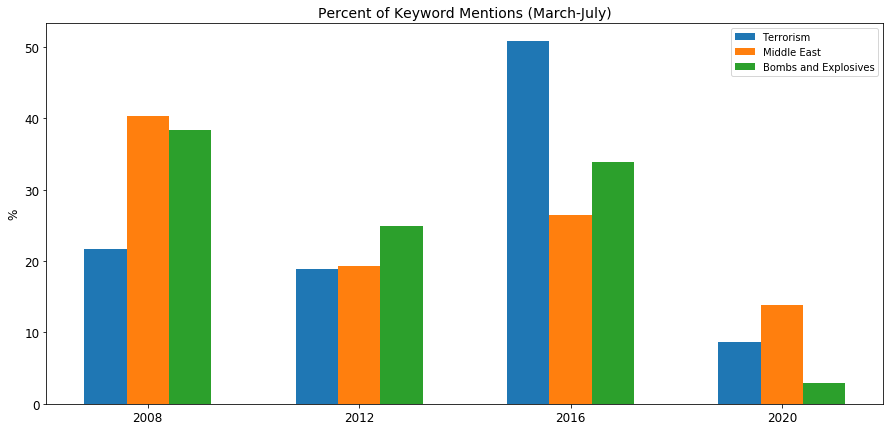

In [22]:
plot_three_keywords("Terrorism","Middle East","Bombs and Explosives")

## Immigration

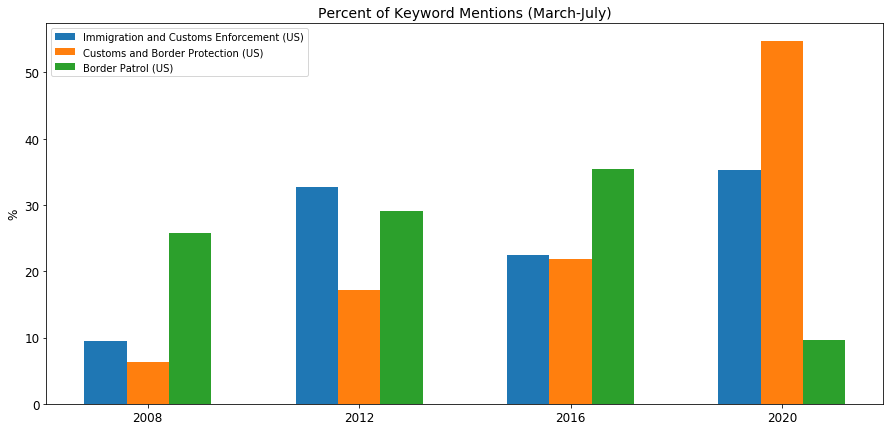

In [23]:
plot_three_keywords("Immigration and Customs Enforcement (US)","Customs and Border Protection (US)","Border Patrol (US)")

## Environment

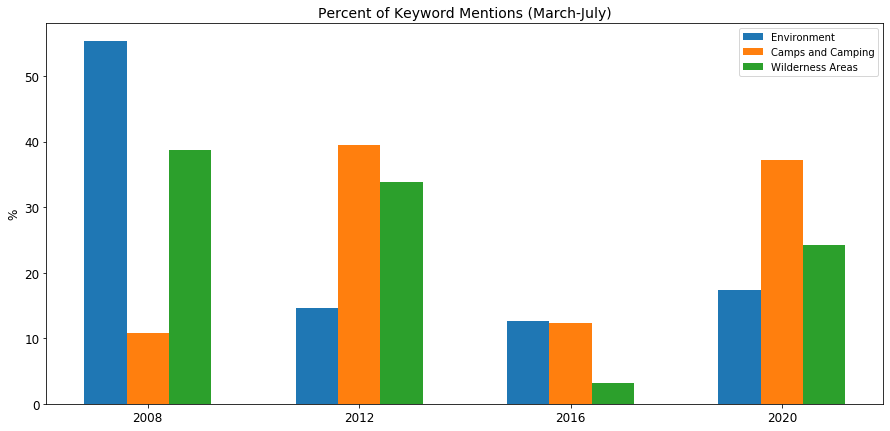

In [24]:
plot_three_keywords("Environment","Camps and Camping","Wilderness Areas")